# Atividade em Grupo


Vamos fazer uma análise de um dataset de sentimento, para isso, escolha um dataset qualquer, recomendo pegar um do Kaggle
https://www.kaggle.com/datasets?search=sentiment+analysis

Faça a análise dos dados e responda as perguntas:

1. Descreve como são os dados do dataset escolhido.
2. Que tipo de limpeza de dados vocês fizeram?
3. Quais são os termos mais frequêntes?
4. Qual o balanciamento dos dados antes da limpeza e após a limpeza?
5. Considere que vocês devem expandir essa base de dados
  - Quais as fontes de dados vocês podem usar?
  - Descreva como vocês iriam coletar esses dados?

# Bibliotecas

In [ ]:
import pandas as pd
import math
import spacy
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1- Coleta dos dados da
* 1.1 Acesso/coleta dos dados
* 1.2 Análise dos dados
* 1.2.1 Nuvem de palavras
* 1.2.2 Frequencia de palavras


## 1.1 Acesso/coleta dos dados

In [ ]:
# Importar doc
raw_data = pd.read_csv('https://raw.githubusercontent.com/tathi-martins/Dataframes/refs/heads/main/Fin_Cleaned.csv')

raw_data.head()

,Date_published,Headline,Synopsis,Full_text,Final Status
0,2022-06-21,"Banks holding on to subsidy share, say payment...",The companies have written to the National Pay...,ReutersPayments companies and banks are at log...,Negative
1,2022-04-19,Digitally ready Bank of Baroda aims to click o...,"At present, 50% of the bank's retail loans are...",AgenciesThe bank presently has 20 million acti...,Positive
2,2022-05-27,Karnataka attracted investment commitment of R...,Karnataka is at the forefront in attracting in...,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,2022-04-06,Splitting of provident fund accounts may be de...,The EPFO is likely to split accounts only at t...,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,2022-06-14,Irdai weighs proposal to privatise Insurance I...,"Set up in 2009 as an advisory body, IIB collec...",AgenciesThere is a view in the insurance indus...,Positive


## 1.2 Análise dos dados

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date_published  400 non-null    object
 1   Headline        400 non-null    object
 2   Synopsis        399 non-null    object
 3   Full_text       400 non-null    object
 4   Final Status    400 non-null    object
dtypes: object(5)
memory usage: 15.8+ KB


In [ ]:
raw_data.dropna(subset=['Synopsis'], inplace=True)

In [ ]:
raw_data.isnull().sum()

,0
Date_published,0
Headline,0
Synopsis,0
Full_text,0
Final Status,0


### 1.2.1 Nuvem de palavras

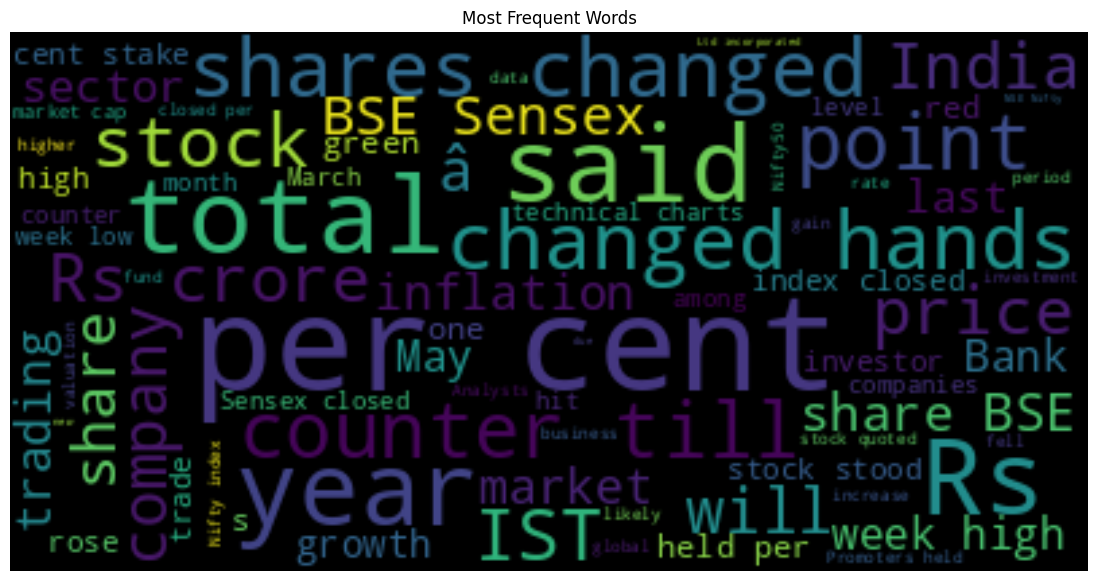

In [ ]:
posts = ' '.join(raw_data['Synopsis'].astype(str))
wordcloud = WordCloud(max_font_size = 50, max_words = 75, background_color = "black").generate(posts)

plt.figure(figsize = (15, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.title("Most Frequent Words")
plt.axis("off")
plt.show()

In [ ]:
df_raw_tokenized = raw_data['Synopsis']
tokens_list = [word_tokenize(item) for item in df_raw_tokenized]
tokens_list

[['The',
  'companies',
  'have',
  'written',
  'to',
  'the',
  'National',
  'Payments',
  'Corp.',
  'of',
  'India',
  '(',
  'NPCI',
  ')',
  ',',
  'complaining',
  'that',
  'â‚¹700',
  'crore',
  'of',
  'the',
  'â‚¹1,500',
  'crore',
  'granted',
  'in',
  'the',
  'budget',
  'is',
  'being',
  'retained',
  'by',
  'banks',
  '.'],
 ['At',
  'present',
  ',',
  '50',
  '%',
  'of',
  'the',
  'bank',
  "'s",
  'retail',
  'loans',
  'are',
  'sourced',
  'digitally',
  '.',
  'Out',
  'of',
  'this',
  ',',
  '97',
  '%',
  'of',
  'the',
  'bank',
  "'s",
  'personal',
  'loans',
  'are',
  'disbursed',
  'end-to-end',
  'digitally',
  'while',
  'the',
  'bulk',
  'of',
  'the',
  'home',
  'loan',
  'originations',
  'is',
  'done',
  'digitally',
  '.'],
 ['Karnataka',
  'is',
  'at',
  'the',
  'forefront',
  'in',
  'attracting',
  'investments',
  'and',
  'the',
  'WEF',
  'Meet',
  'has',
  'proved',
  'to',
  'be',
  'a',
  '``',
  'success',
  "''",
  ',',
  'he

In [ ]:
def tokenize_text(text):
  tokens = word_tokenize(text)
  return tokens

raw_data['Synopsis_tokens'] = raw_data['Synopsis'].apply(tokenize_text)

raw_data['Synopsis_tokens']

,Synopsis_tokens
0,"[The, companies, have, written, to, the, Natio..."
1,"[At, present, ,, 50, %, of, the, bank, 's, ret..."
2,"[Karnataka, is, at, the, forefront, in, attrac..."
3,"[The, EPFO, is, likely, to, split, accounts, o..."
4,"[Set, up, in, 2009, as, an, advisory, body, ,,..."
...,...
395,"[These, banks, raised, their, respective, exte..."
396,"[In, the, event, of, non-payment, ,, it, will,..."
397,"[A, total, of, 10,105, shares, changed, hands,..."
398,"[Calling, the, stock, 'attractively, valued, '..."


### 1.2.2 Frequencia de palavras

In [ ]:

def calculate_token_frequencies(tokens_list):

  all_tokens = [token for sublist in tokens_list for token in sublist]
  token_counts = Counter(all_tokens)
  total_tokens = len(all_tokens)

  token_frequencies = {token: count / total_tokens for token, count in token_counts.items()}

  return token_frequencies


token_frequencies = calculate_token_frequencies(tokens_list)

for token, frequency in token_frequencies.items():
  print(f"{token}: {frequency:.8f}")

The: 0.01241932
companies: 0.00098047
have: 0.00245118
written: 0.00008171
to: 0.01560585
the: 0.04902361
National: 0.00049024
Payments: 0.00008171
Corp.: 0.00008171
of: 0.02786175
India: 0.00302312
(: 0.00898766
NPCI: 0.00008171
): 0.00915107
,: 0.04510172
complaining: 0.00008171
that: 0.00514748
â‚¹700: 0.00008171
crore: 0.00334995
â‚¹1,500: 0.00008171
granted: 0.00008171
in: 0.02058992
budget: 0.00008171
is: 0.00678160
being: 0.00040853
retained: 0.00008171
by: 0.00514748
banks: 0.00073535
.: 0.03684942
At: 0.00024512
present: 0.00016341
50: 0.00065365
%: 0.00580113
bank: 0.00081706
's: 0.00310483
retail: 0.00008171
loans: 0.00024512
are: 0.00285971
sourced: 0.00008171
digitally: 0.00024512
Out: 0.00008171
this: 0.00155241
97: 0.00008171
personal: 0.00008171
disbursed: 0.00008171
end-to-end: 0.00008171
while: 0.00416701
bulk: 0.00008171
home: 0.00008171
loan: 0.00016341
originations: 0.00008171
done: 0.00016341
Karnataka: 0.00008171
at: 0.01299126
forefront: 0.00008171
attracting: 0

# 2- Limpeza e análise de balanceamento dos dados
* 2.1 Análise de balanceamento antes da limpeza
* 2.2 Limpeza dos dados
* 2.3 Análise de balanceamento após a limpeza




## 2.1 Análise de balanceamento antes da limpeza

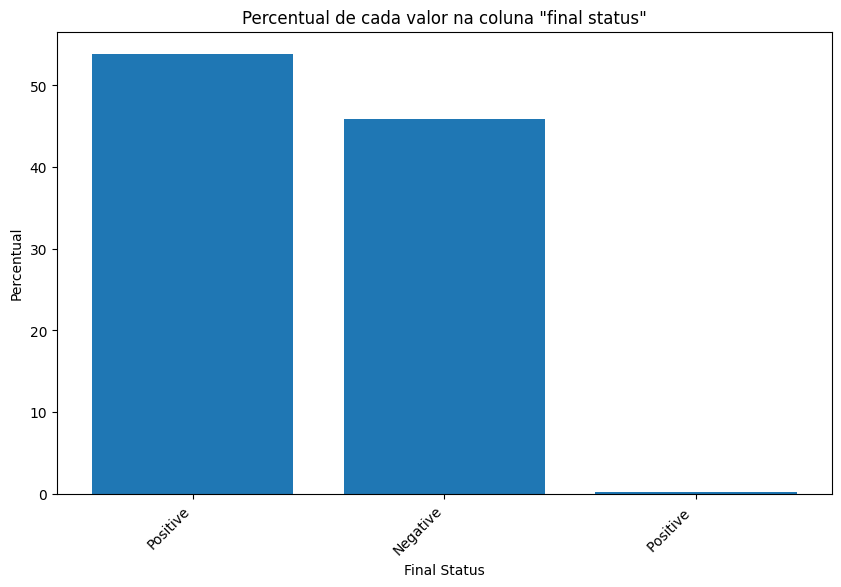

In [ ]:
status_percent = raw_data['Final Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(status_percent.index, status_percent.values)
plt.xlabel('Final Status')
plt.ylabel('Percentual')
plt.title('Percentual de cada valor na coluna "final status"')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
raw_data['Final Status'] = raw_data['Final Status'].replace('Positive ', 'Positive')

## 2.2 Análise de balanceamento após a limpeza

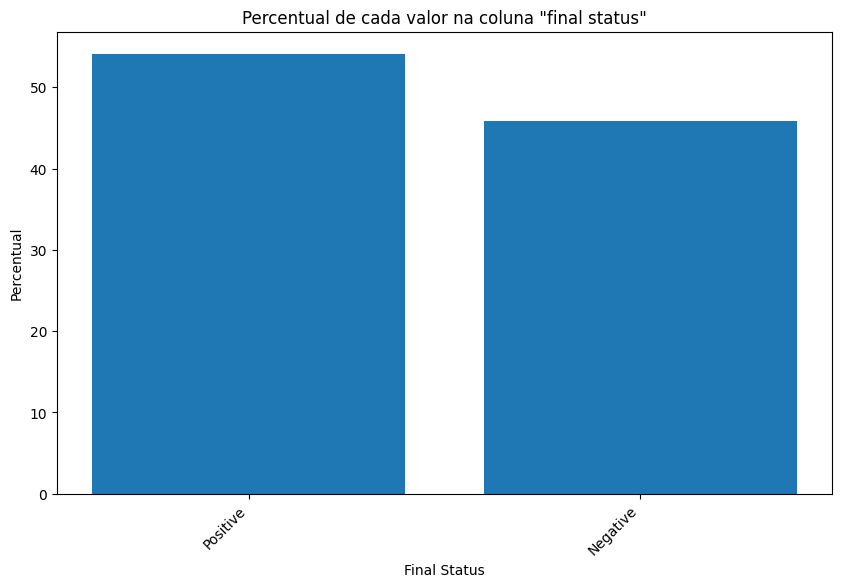

In [ ]:
status_percent = raw_data['Final Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
plt.bar(status_percent.index, status_percent.values)
plt.xlabel('Final Status')
plt.ylabel('Percentual')
plt.title('Percentual de cada valor na coluna "final status"')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
synopsis = raw_data['Synopsis']
for idx, doc in enumerate(synopsis[:5]):
  print(f'Documento {idx+1}: {doc}')

Documento 1: The companies have written to the National Payments Corp. of India (NPCI), complaining that â‚¹700 crore of the â‚¹1,500 crore granted in the budget is being retained by banks.
Documento 2: At present, 50% of the bank's retail loans are sourced digitally. Out of this, 97% of the bank's personal loans are disbursed end-to-end digitally while the bulk of the home loan originations is done digitally. 
Documento 3: Karnataka is at the forefront in attracting investments and the WEF Meet has proved to be a "success", he said, as he asserted that the State has "not lost or is not going to lose" in attracting investments in the backdrop of such concerns citing certain developments locally.
Documento 4: The EPFO is likely to split accounts only at the time of crediting the interest for FY22, which generally happens between September and December of the following fiscal year, they added. The EPFO had declared an interest rate of 8.1% for FY22 at its central board of trustees meetin

## 2.3 Limpeza dos dados

In [ ]:
# Instanciar o lematizador
lemmatizer = WordNetLemmatizer()

In [ ]:
# Função para remover acentuação e normalizar unicode
def remover_acentuacao(texto):
   #Converter para string se não for
   if not isinstance(texto, str):
        texto = str(texto)
   return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

# Função para converter tags de POS do nltk para as do WordNet
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()  # Converter o primeiro caractere para maiúsculo
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Retorna substantivo se a tag não for encontrada

# Definindo as expressões regulares para limpar os dados
punctuation_regex = r'[.,!?()"<>]'

# Função de limpeza do texto
def limpar_documento(doc):
    # Normaliza o unicode (remove acentuação)
    doc = remover_acentuacao(doc)

    # Remove sucessivos espaços brancos e quebras de linhas
    #doc = doc.strip()

    # Remove pontuações
    doc = re.sub(punctuation_regex, '', doc)

    # Mantém apenas caracteres alfabéticos e espaços
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)

    # Tratar diferentes tipos de quebras de linha (\n, \r, \r\n)
    doc = re.sub(r"[\r\n]+", " ", doc)  # Substituir múltiplas quebras de linha (em qualquer formato) por espaço

    # Substituir tabs (\t) e outros espaços não visíveis por um espaço comum
    doc = re.sub(r"\t+", " ", doc)  # Substituir múltiplos tabs por espaço

    # Finalmente, remover múltiplos espaços seguidos
    doc = re.sub(r"\s+", " ", doc)  # Substituir múltiplos espaços consecutivos por um único espaço

    # Tokeniza o texto
    tokens = re.findall(r'\b\w+\b', doc.lower())  # Conversão para minúsculas e tokenização

    # Remove stopwords e palavras indesejadas **antes** de aplicar o stemming
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word and len(word) > 2]

    # Aplica lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)).lower() for word in filtered_tokens]

    # Retorna o texto limpo e stemmado
    return ' '.join(lemmatized_words)

In [ ]:
# Aplicar a limpeza a cada documento
txt_limpo = [limpar_documento(doc) for doc in synopsis]

# Exibir o resultado dos documentos limpos
for idx, doc in enumerate(txt_limpo[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
company write national payment corp india npci complain crore crore grant budget retain bank
========== Doc 1 ==========
present bank retail loan source digitally bank personal loan disburse endtoend digitally bulk home loan origination do digitally
========== Doc 2 ==========
karnataka forefront attract investment wef meet prove success say assert state lose go lose attract investment backdrop concern cite certain development locally
========== Doc 3 ==========
epfo likely split account time credit interest generally happens september december follow fiscal year add epfo declare interest rate central board trustee meeting last month
========== Doc 4 ==========
set advisory body iib collect transactional data insurer different line business produce periodical report benefit stakeholder insurance industry convert independent society


# 3- Stemming e Lemmatization

> Adicionar blockquote


* 3.1 Analise se o Stemming e o Lemmatization podem te ajudar aqui

# 4- Tópicos
* 4.1 Faça o TF-IDF dos documentos
* 4.2 Com base no notebook da Aula 04, faça a geração de tópicos

## 4.1 Faça o TF-IDF dos documentos

In [ ]:
# Inicializando o vetor TF-IDF com filtros de frequência mínima e máxima
vectorizer = TfidfVectorizer(min_df=5, max_df=0.90)

# Calculando a matriz TF-IDF com os documentos limpos e stemmados
tfidf_matrix = vectorizer.fit_transform(txt_limpo)

# Convertendo a matriz para um DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Exibindo o DataFrame com TF-IDF
print(tfidf_df)

# Identificando os 5 termos com o maior TF-IDF
top_terms = tfidf_df.max().sort_values(ascending=False).head(5)
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms)


     accord   account  act       add      also  among  analyst  april  around  \
0       0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
1       0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
2       0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
3       0.0  0.250428  0.0  0.239052  0.000000    0.0  0.00000    0.0     0.0   
4       0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
..      ...       ...  ...       ...       ...    ...      ...    ...     ...   
394     0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
395     0.0  0.312538  0.0  0.000000  0.292276    0.0  0.00000    0.0     0.0   
396     0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   
397     0.0  0.000000  0.0  0.000000  0.000000    0.0  0.26176    0.0     0.0   
398     0.0  0.000000  0.0  0.000000  0.000000    0.0  0.00000    0.0     0.0   

     asian  ...  tuesday  t

## 4.1.2 TF-IDF com função própria

In [ ]:
# Aplicar a tokenização a cada documento
tokens = [word_tokenize(doc) for doc in txt_limpo]
#print(tokens)

# Exibir o resultado dos documentos tokenizados
for idx, doc in enumerate(tokens[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)


========== Doc 0 ==========
['company', 'write', 'national', 'payment', 'corp', 'india', 'npci', 'complain', 'crore', 'crore', 'grant', 'budget', 'retain', 'bank']
========== Doc 1 ==========
['present', 'bank', 'retail', 'loan', 'source', 'digitally', 'bank', 'personal', 'loan', 'disburse', 'endtoend', 'digitally', 'bulk', 'home', 'loan', 'origination', 'do', 'digitally']
========== Doc 2 ==========
['karnataka', 'forefront', 'attract', 'investment', 'wef', 'meet', 'prove', 'success', 'say', 'assert', 'state', 'lose', 'go', 'lose', 'attract', 'investment', 'backdrop', 'concern', 'cite', 'certain', 'development', 'locally']
========== Doc 3 ==========
['epfo', 'likely', 'split', 'account', 'time', 'credit', 'interest', 'generally', 'happens', 'september', 'december', 'follow', 'fiscal', 'year', 'add', 'epfo', 'declare', 'interest', 'rate', 'central', 'board', 'trustee', 'meeting', 'last', 'month']
========== Doc 4 ==========
['set', 'advisory', 'body', 'iib', 'collect', 'transactional'

In [ ]:
# Contar as ocorrências de cada palavra em cada lista
word_counts = [Counter(doc) for doc in tokens]

# Exibir o resultado
for idx, count in enumerate(word_counts[:5]):
    print(f"========== Doc {idx} ==========")
    print(count)


========== Doc 0 ==========
Counter({'crore': 2, 'company': 1, 'write': 1, 'national': 1, 'payment': 1, 'corp': 1, 'india': 1, 'npci': 1, 'complain': 1, 'grant': 1, 'budget': 1, 'retain': 1, 'bank': 1})
========== Doc 1 ==========
Counter({'loan': 3, 'digitally': 3, 'bank': 2, 'present': 1, 'retail': 1, 'source': 1, 'personal': 1, 'disburse': 1, 'endtoend': 1, 'bulk': 1, 'home': 1, 'origination': 1, 'do': 1})
========== Doc 2 ==========
Counter({'attract': 2, 'investment': 2, 'lose': 2, 'karnataka': 1, 'forefront': 1, 'wef': 1, 'meet': 1, 'prove': 1, 'success': 1, 'say': 1, 'assert': 1, 'state': 1, 'go': 1, 'backdrop': 1, 'concern': 1, 'cite': 1, 'certain': 1, 'development': 1, 'locally': 1})
========== Doc 3 ==========
Counter({'epfo': 2, 'interest': 2, 'likely': 1, 'split': 1, 'account': 1, 'time': 1, 'credit': 1, 'generally': 1, 'happens': 1, 'september': 1, 'december': 1, 'follow': 1, 'fiscal': 1, 'year': 1, 'add': 1, 'declare': 1, 'rate': 1, 'central': 1, 'board': 1, 'trustee': 1,

In [ ]:
# Calculando o TF
def computeTF(word_dict):
    tfDict = {}
    doc_lenght = len(word_dict)
    for word, count in word_dict.items():
        tfDict[word] = count / float(doc_lenght)
    return tfDict

# Função para calcular o IDF
def computeIDF(documents):
    N = len(documents)  # Número total de documentos
    idfDict = {}

    # Contar o número de documentos em que cada palavra aparece
    word_document_counts = Counter()
    for doc in documents:
        for word in doc:
            word_document_counts[word] += 1

    # Calcular o IDF para cada palavra
    for word, count in word_document_counts.items():
        idfDict[word] = math.log(N / float(count))

    return idfDict

# Função para calcular o TF-IDF
def computeTFIDF(tf_documents, idfDict):
    tfidf_documents = []
    for tf_doc in tf_documents:
        tfidf_dict = {word: tf * idfDict.get(word, 0) for word, tf in tf_doc.items()}
        tfidf_documents.append(tfidf_dict)
    return tfidf_documents

In [ ]:
# Aplicar a função que conta o TF de cada documento
tf_documents = [computeTF(doc) for doc in word_counts]

for idx, doc in enumerate(tf_documents[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'company': 0.07692307692307693, 'write': 0.07692307692307693, 'national': 0.07692307692307693, 'payment': 0.07692307692307693, 'corp': 0.07692307692307693, 'india': 0.07692307692307693, 'npci': 0.07692307692307693, 'complain': 0.07692307692307693, 'crore': 0.15384615384615385, 'grant': 0.07692307692307693, 'budget': 0.07692307692307693, 'retain': 0.07692307692307693, 'bank': 0.07692307692307693}
========== Doc 1 ==========
{'present': 0.07692307692307693, 'bank': 0.15384615384615385, 'retail': 0.07692307692307693, 'loan': 0.23076923076923078, 'source': 0.07692307692307693, 'digitally': 0.23076923076923078, 'personal': 0.07692307692307693, 'disburse': 0.07692307692307693, 'endtoend': 0.07692307692307693, 'bulk': 0.07692307692307693, 'home': 0.07692307692307693, 'origination': 0.07692307692307693, 'do': 0.07692307692307693}
========== Doc 2 ==========
{'karnataka': 0.05263157894736842, 'forefront': 0.05263157894736842, 'attract': 0.10526315789473684, 'investm

In [ ]:
# Calcular o IDF
idf_dict = computeIDF(word_counts)

print(idf_dict)

{'company': 2.0769384114617173, 'write': 5.295814236329918, 'national': 4.197201947661808, 'payment': 4.197201947661808, 'corp': 5.988961416889864, 'india': 2.5877640352277083, 'npci': 5.988961416889864, 'complain': 5.988961416889864, 'crore': 2.5232255140901367, 'grant': 5.295814236329918, 'budget': 5.988961416889864, 'retain': 5.295814236329918, 'bank': 2.5232255140901367, 'present': 4.890349128221754, 'retail': 5.295814236329918, 'loan': 4.602667055769973, 'source': 4.602667055769973, 'digitally': 5.988961416889864, 'personal': 5.988961416889864, 'disburse': 5.988961416889864, 'endtoend': 5.988961416889864, 'bulk': 5.988961416889864, 'home': 5.988961416889864, 'origination': 5.988961416889864, 'do': 5.295814236329918, 'karnataka': 5.988961416889864, 'forefront': 5.988961416889864, 'attract': 5.295814236329918, 'investment': 3.9095198752100275, 'wef': 5.988961416889864, 'meet': 5.988961416889864, 'prove': 5.988961416889864, 'success': 4.890349128221754, 'say': 1.8780875527165524, 'as

In [ ]:
# Calcular o TF-IDF para cada documento
tfidf_documents = computeTFIDF(tf_documents, idf_dict)

# Exibir o resultado
for idx, doc in enumerate(tfidf_documents[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'company': 0.15976449318936287, 'write': 0.4073703258715322, 'national': 0.3228616882816776, 'payment': 0.3228616882816776, 'corp': 0.46068933976075876, 'india': 0.19905877194059296, 'npci': 0.46068933976075876, 'complain': 0.46068933976075876, 'crore': 0.38818854062925184, 'grant': 0.4073703258715322, 'budget': 0.46068933976075876, 'retain': 0.4073703258715322, 'bank': 0.19409427031462592}
========== Doc 1 ==========
{'present': 0.37618070217090416, 'bank': 0.38818854062925184, 'retail': 0.4073703258715322, 'loan': 1.062153935946917, 'source': 0.3540513119823056, 'digitally': 1.3820680192822763, 'personal': 0.46068933976075876, 'disburse': 0.46068933976075876, 'endtoend': 0.46068933976075876, 'bulk': 0.46068933976075876, 'home': 0.46068933976075876, 'origination': 0.46068933976075876, 'do': 0.4073703258715322}
========== Doc 2 ==========
{'karnataka': 0.3152084956257823, 'forefront': 0.3152084956257823, 'attract': 0.5574541301399913, 'investment': 0.411528

In [ ]:
# Converta a lista de dicionários em dataframe
df = pd.DataFrame(tfidf_documents)

# Encontra os valores mais altos de TF_IDF  para cada termo de cada documento
max_tfidf = df.max()

# Ordena os termos em ordem decrescente
top_terms = max_tfidf.sort_values(ascending=False).head(5)

# Print the top 5 terms
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms)


Top 5 termos com maior TF-IDF:
retirement    1.711132
goal          1.497240
digitally     1.382068
fiscal        1.347684
prior         1.323954
dtype: float64


Os cinco termos mais frequentes nos documentos são diferentes dependendo do método de calculo do TF-IDF. Porque será?

1. **Normalização e Escalonamento dos Valores**

O TfidfVectorizer do Scikit-learn aplica uma normalização adicional aos vetores TF-IDF, geralmente utilizando a norma L2. Essa normalização ajusta os valores TF-IDF de forma que o comprimento do vetor para cada documento seja 1, distribuindo proporcionalmente os pesos para cada palavra dentro do documento.
Na função própria, não houve normalização. Isso significa que os valores TF-IDF resultantes podem ter magnitudes diferentes e, consequentemente, alterar os valores relativos de cada termo.

2. **Definição do TF (Term Frequency)**

O Scikit-learn usa por padrão uma definição de TF com ajuste de sublinearidade (usando
1 + log
⁡
(
tf
)
1+log(tf) em vez de apenas TF). Essa abordagem reduz a diferença entre termos de alta frequência e baixa frequência dentro do mesmo documento. Esta abordagem não foi aplicada no função própria, foi utilizado apenas o cálculo clássico de TF com uma proporção simples entre a contagem de ocorrências de uma palavra e o total de palavras do documento, podendo resultar em valores diferentes de TF-IDF para termos comuns e raros.

3. **Método de Cálculo do IDF (Inverse Document Frequency)**

Scikit-learn usa por padrão uma variação no cálculo do IDF, adicionando uma unidade ao denominador, ou seja,
IDF
=
log
⁡
(
𝑁
+
1
df
+
1
)
+
1
IDF=log(
df+1
N+1
​
 )+1, para evitar divisões por zero e aumentar a estabilidade numérica.
Na função própria, o IDF foi definido como
IDF
=
log
⁡
(
𝑁
df
)
IDF=log(
df
N
​
 ), sem esse ajuste. Isso pode causar variações nos valores de IDF, especialmente para palavras que aparecem em muitos documentos.

4. **Precisão Numérica e Arredondamento**

O Scikit-learn utiliza cálculos otimizados e métodos que podem ter um nível mais alto de precisão e arredondamento, enquanto que a função própria pode apresentar pequenas diferenças devido ao tipo de dados e arredondamentos feitos implicitamente.

In [ ]:
# Função otimizada para calcular o TF com ajuste logarítmico
def computeTF(word_dict):
    tfDict = {}
    for word, count in word_dict.items():
        # Suavização logarítmica
        tfDict[word] = 1 + math.log(count) if count > 0 else 0
    return tfDict

# Função aprimorada para calcular o IDF com suavização
def computeIDF(documents):
    N = len(documents)  # Número total de documentos
    idfDict = {}

    # Contar em quantos documentos cada palavra aparece
    word_document_counts = Counter()
    for doc in documents:
        for word in set(doc):  # Usar 'set(doc)' para evitar duplicações
            word_document_counts[word] += 1

    # Calcular o IDF suavizado
    for word, count in word_document_counts.items():
        idfDict[word] = math.log((N + 1) / (count + 1)) + 1

    return idfDict

# Função aprimorada para calcular o TF-IDF com normalização L2
def computeTFIDF(tf_documents, idfDict):
    tfidf_documents = []

    for tf_doc in tf_documents:
        # Calcular o TF-IDF multiplicando o TF e o IDF de cada palavra
        tfidf_dict = {word: tf * idfDict.get(word, 0) for word, tf in tf_doc.items()}

        # Calcular a norma L2
        norm = math.sqrt(sum([value**2 for value in tfidf_dict.values()]))

        # Normalizar os valores TF-IDF com a norma L2
        tfidf_dict = {word: (value / norm) for word, value in tfidf_dict.items()} if norm > 0 else tfidf_dict
        tfidf_documents.append(tfidf_dict)

    return tfidf_documents


In [ ]:
# Aplicar a função que conta o TF de cada documento
tf_documents2 = [computeTF(doc) for doc in word_counts]

for idx, doc in enumerate(tf_documents2[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'company': 1.0, 'write': 1.0, 'national': 1.0, 'payment': 1.0, 'corp': 1.0, 'india': 1.0, 'npci': 1.0, 'complain': 1.0, 'crore': 1.6931471805599454, 'grant': 1.0, 'budget': 1.0, 'retain': 1.0, 'bank': 1.0}
========== Doc 1 ==========
{'present': 1.0, 'bank': 1.6931471805599454, 'retail': 1.0, 'loan': 2.09861228866811, 'source': 1.0, 'digitally': 2.09861228866811, 'personal': 1.0, 'disburse': 1.0, 'endtoend': 1.0, 'bulk': 1.0, 'home': 1.0, 'origination': 1.0, 'do': 1.0}
========== Doc 2 ==========
{'karnataka': 1.0, 'forefront': 1.0, 'attract': 1.6931471805599454, 'investment': 1.6931471805599454, 'wef': 1.0, 'meet': 1.0, 'prove': 1.0, 'success': 1.0, 'say': 1.0, 'assert': 1.0, 'state': 1.0, 'lose': 1.6931471805599454, 'go': 1.0, 'backdrop': 1.0, 'concern': 1.0, 'cite': 1.0, 'certain': 1.0, 'development': 1.0, 'locally': 1.0}
========== Doc 3 ==========
{'epfo': 1.6931471805599454, 'likely': 1.0, 'split': 1.0, 'account': 1.0, 'time': 1.0, 'credit': 1.0, 'int

In [ ]:
# Calcular o IDF
idf_dict2 = computeIDF(word_counts)

print(idf_dict2)

{'corp': 6.298317366548036, 'npci': 6.298317366548036, 'complain': 6.298317366548036, 'write': 5.892852258439873, 'crore': 3.494956985641502, 'payment': 5.045554398052669, 'company': 3.059638914383656, 'bank': 3.494956985641502, 'retain': 5.892852258439873, 'india': 3.557477342622836, 'grant': 5.892852258439873, 'national': 5.045554398052669, 'budget': 6.298317366548036, 'home': 6.298317366548036, 'endtoend': 6.298317366548036, 'disburse': 6.298317366548036, 'present': 5.605170185988092, 'bulk': 6.298317366548036, 'do': 5.892852258439873, 'origination': 6.298317366548036, 'personal': 6.298317366548036, 'digitally': 6.298317366548036, 'loan': 5.382026634673881, 'retail': 5.892852258439873, 'source': 5.382026634673881, 'cite': 6.298317366548036, 'success': 5.605170185988092, 'say': 2.86433016206289, 'locally': 6.298317366548036, 'concern': 5.382026634673881, 'attract': 5.892852258439873, 'forefront': 6.298317366548036, 'certain': 6.298317366548036, 'lose': 5.382026634673881, 'investment'

In [ ]:
# Calcular o TF-IDF para cada documento
tfidf_documents2 = computeTFIDF(tf_documents2, idf_dict2)

# Exibir o resultado
for idx, doc in enumerate(tfidf_documents2[:5]):
    print(f"========== Doc {idx} ==========")
    print(doc)

========== Doc 0 ==========
{'company': 0.15633700900391598, 'write': 0.301104451330998, 'national': 0.25781044934742176, 'payment': 0.25781044934742176, 'corp': 0.32182232165193064, 'india': 0.18177483778568337, 'npci': 0.32182232165193064, 'complain': 0.32182232165193064, 'crore': 0.3023626686454229, 'grant': 0.301104451330998, 'budget': 0.32182232165193064, 'retain': 0.301104451330998, 'bank': 0.1785802629074619}
========== Doc 1 ==========
{'present': 0.2110811559421267, 'bank': 0.22284208194467156, 'retail': 0.22191477247508196, 'loan': 0.42534243675957784, 'source': 0.2026779501179432, 'digitally': 0.49775704172728175, 'personal': 0.23718389738544063, 'disburse': 0.23718389738544063, 'endtoend': 0.23718389738544063, 'bulk': 0.23718389738544063, 'home': 0.23718389738544063, 'origination': 0.23718389738544063, 'do': 0.22191477247508196}
========== Doc 2 ==========
{'karnataka': 0.2221757356634867, 'forefront': 0.2221757356634867, 'attract': 0.3519592235683589, 'investment': 0.28634

In [ ]:
# Converta a lista de dicionários em dataframe
df2 = pd.DataFrame(tfidf_documents2)

# Encontra os valores mais altos de TF_IDF  para cada termo de cada documento
max_tfidf2 = df2.max()

# Ordena os termos em ordem decrescente
top_terms2 = max_tfidf2.sort_values(ascending=False).head(5)

# Print the top 5 terms
print("\nTop 5 termos com maior TF-IDF:")
print(top_terms2)


Top 5 termos com maior TF-IDF:
week       0.651738
realty     0.610084
pharma     0.610084
trading    0.588523
goal       0.585421
dtype: float64


Mesmo com as mudanças feitas para alinhar o cálculo manual ao Scikit-learn, ainda há algumas diferenças nos resultados.

Isso pode acontecer se termos como, por exemplo, "bank" e "investment" aparecem em muitos documentos, o IDF será menor para esses termos no Scikit-learn, enquanto que na função própria, esses valores não estão sendo ajustados.

Palavras com frequência baixa, termos únicos e muito raros, podem acabar tendo TF-IDF mais alto na função manual devido à diferença de normalização.

# 5- Classificação
* 5.1 Implemente um modelo de classificação a escolha do grupo. (Dica: use algum que vocês viram em ML, a ideia não é ter o melhor modelo, mas entender o fluxo completo)


In [ ]:
# Separar os dados em treino e teste (30% para teste)
X_train, X_test, y_train, y_test = train_test_split(
    txt_limpo, raw_data['Final Status'], test_size=0.3, random_state=42
)

# Criar um vetorizador TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_df=0.90)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Criar um modelo SVM (Support Vector Machine)
model = SVC(kernel='linear')  # Você pode experimentar outros kernels (e.g., 'rbf', 'poly')

# Treinar o modelo com os dados de treinamento
model.fit(X_train_tfidf, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test_tfidf)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

# Adicionar uma coluna com a classificação no dataframe original
raw_data['Predicted_Status'] = ''
raw_data.loc[raw_data.index.isin(y_test.index), 'Predicted_Status'] = y_pred

raw_data[['Synopsis', 'Final Status', 'Predicted_Status']]

Acurácia do modelo: 0.55

Relatório de classificação:
               precision    recall  f1-score   support

    Negative       0.61      0.48      0.53        65
    Positive       0.51      0.64      0.56        55

    accuracy                           0.55       120
   macro avg       0.56      0.56      0.55       120
weighted avg       0.56      0.55      0.55       120



,Synopsis,Final Status,Predicted_Status
0,The companies have written to the National Pay...,Negative,Positive
1,"At present, 50% of the bank's retail loans are...",Positive,
2,Karnataka is at the forefront in attracting in...,Positive,
3,The EPFO is likely to split accounts only at t...,Negative,Positive
4,"Set up in 2009 as an advisory body, IIB collec...",Positive,
...,...,...,...
395,These banks raised their respective external b...,Negative,Positive
396,"In the event of non-payment, it will recover t...",Negative,Negative
397,"A total of 10,105 shares changed hands on the ...",Negative,
398,Calling the stock 'attractively valued' analys...,Positive,Negative


# Fontes

- Todos os materiais dado em sala de aula
- ChatGPT e Gemini